# Unsupervised Learning

Most of the applications of machine learning today are based on supervised learning, that is where we have labelled data. However the vast majority of data is unlabelled, that is will have input features $X$, but we do not have the input labels $y$. In cases like this we use unsupervised learning. Unsupervised learning has a very large potential and we are just beginning to learn about its applications. 

Lets look at an example of why we need unsupervised learning. Lets say we have a manufacturing production line and we wish to decide which items are defective. Now we can fairly easily create a system that will take picture of the items every day. We will be able to build a reasonably large dataset very quickly. However the data will not be labelled. To make it a supervised learning problem we will need workers to manually go through and label the data, this can end up being a long, costly and tedious task and so it will usually only be done for a small subset of the data, and as a result due to less training instances the classifiers performance will be dissapointing. Also whenever the company creates a new product or changes existing products we will have to start the whole process from scratch.

Unsupervised learning can be used to solve this problem. The algorithm will be able to exploit the unlabelled data without needing the humans to kabel every picture. it would also be able to classify whether an item is defective or not. We will look into this process in this chapter.

Earlier we did dimensionality reduction, which is one of the most common unsupervised learning tasks. We will look at some other tasks as well such as: -

1. Clustering: the goal is to group similar instances together into **clusters**. CLustering is a great tool for data analysis, customer segmentation, recommendation systems, search engines, semi-supervised learning, dimensionality reduction, and more.

2. Anomaly detection - the objective in this case is to figure out what normal data looks like and then use that to detect abnormal instances such as defective items on a production line or a new trend in a time series.

3. Density estimation - this is the task of estimating the **probability density function** (PDF) of the random process that generatd the dataset. Density estimation is commonly used for anomaly detection: instances located in very low density regions are likely to be anomalies. It is also useful for data analysis and visualisation.

This chapter will be divided into the following sections: -
1. Clustering
2. Gaussian Mixtures

## 1. Clustering

Clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters).

To understand this lets look at an example. Lets say you are walking in the park and you see some flowers that you have never seen before, nearby you see other flowers that are similar but are not the same as te ones you saw before as a result you can infer from this information that both the flowers are of the same species or genus. While you may need an expert to tell you what the flowers are, you can definietly tell whether theyare similar or not and this does not require an expert. THis is the concept upon which clustering is built. We identify similar instances and and assign them to clusters or groups of similar instances, where the inter-cluster similarity is less than the intra-cluster similarity.(similarity of instances belonging to the same cluster is higher and similarity between instances belonging to different clusters is lower).

Just like in classification, each instance gets assigned to a group, however unlike classification, it is an unsupervised problem as a result the groups are not known beforehand. The algorithm will figure out the groups on its own. We can take an example of the iris dataset we used earlier, on the left we can see the seperation because of the labels. THe right one does not have access to the labels and so it has to figure out the groups on its own. Since it does not have access to the labels we cannot use a classification algorithm, this is where the clustering algorithm comes in. Most clustering algorithms will easily be able to detect the lower left clusters however on seeing the cluser in the upper right corener it might not be able to detect it as two seperate clusters. However the dataset has two addition features, sepal length and width, which are not represented here and clustering algorithms can made good use of all features, so in fact they identigy the three clusters fairly well (e.g. using a Gaussian mixture model, only 5 instances out of 150 are assigned to the wrong cluster). 

Clustering is used in a wide variety of applications such as: -

1. Customer segmentation: you can cluster you customer based on their purchases and their activity in the website. This is useful to understand who your customer sare and what thet need, so you can adapt yoyr products and marketing campaigns to each segment. For example, customer segmentation can be useful in recommender sustems to suggest content that other users in the same cluster enjoyed.

2. Data Analysis: when you analyse a new dataset, it can be useful to run a clutering algorithm and then alayse each cluster seperately. This can help you gain some insights on the dataset. For example, you can use clustering to detect the main topics discussed in a collection of newsgroups posts, or to find similar groups of customers.

3. Dimensionality Reduction: once a dataset has been clustered it is possible to measure each instances **affinity** with each cluster (affinity is a measure of how well an instance fits into a cluster). Each instances feature vector $x$ can then be replaed with a vector of its cluster affinities. If there are $k$ clusters then this vector is $k$-dimensional. This vector is typically of much lower-dimensional than the original feature vector, but it can preserve enough information for further processing. This is called **feature vector compression**. For example, you can use clustering for dimensionality reduction, then feed the resulting vectors to a linear classifier such as a logistic regression classifier.

4. Anomaly Detection (Outlier Detecion): any instance that has a low affinity to all the clusters is likely to be an anomaly. FOr example if you have clustere the users on your wesbite based on their behavious, such as an unusual number of requests per second. Anomaly detection is typically useful for fraud detection, for example, you can use it to detect credit card fraud.

5. Semi-Supervised Learning: if you have only a few instances with labels but a very large dataset, then you could perform clustering and propogate those labels to all the instances in the same clusters. This technique can greatly increase the amount of labelled data available for training, which in turn will lead to an increased performance of the subsequent supervised learning algorithms.

6. Search Engines: some search engines let you search for images similar to a reference image. To build such a system you would first have to appy a clustering algorithm to all the images in your database; similar images would end up in the same cluster. Then when a user provides a reference image, we can find similar images by finding the cluster this image would belong to and then simply return all images from that cluster.

7. Image Segmentation:by clustering pixels according to their color then replacing each pixels color it is possible to find the mean color o its cluster, it is hence possible to considerably reduce the number of colors in the image. Image segmentation is used in many object detection and tracking system as it makes it easier to detect the contour of ech object.

There is no universal definition of what a cluster is: it really depends on the context and different algorithms will cpature different kinds of clusters, some algorithms look for instances centered around a particular point called a **centroid**. Others look for continous regions of densely packed instances: these clusters can take on any shape. SOme algorithms are hierarchal, looking for clusters of clusters.

In this section we will look at the two most popular clustering algorithms, K-Means and DBSCAN, we will explore some of their applications such as nonlinear dimensionality reduction, semi-supervised learning, and anomaly detection.

### 1.1 K-Means

Lets say we consider an unlabeled dataset given below in the diagram. We can clearly see that there are five blobs os instances. The K-Means algorithm is a simple algorithm capable of clustering this type of data very efficiently and quickly, often in just a few iterations. Lets train the algorithm on this dataset. It will try to find each blobs center and assign each instance to the closest blob.

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
X, y = datasets.make_blobs(n_samples=1000, n_features=2, centers=5, cluster_std=[0.5, 0.5, 0.5, 1, 1], random_state=42)

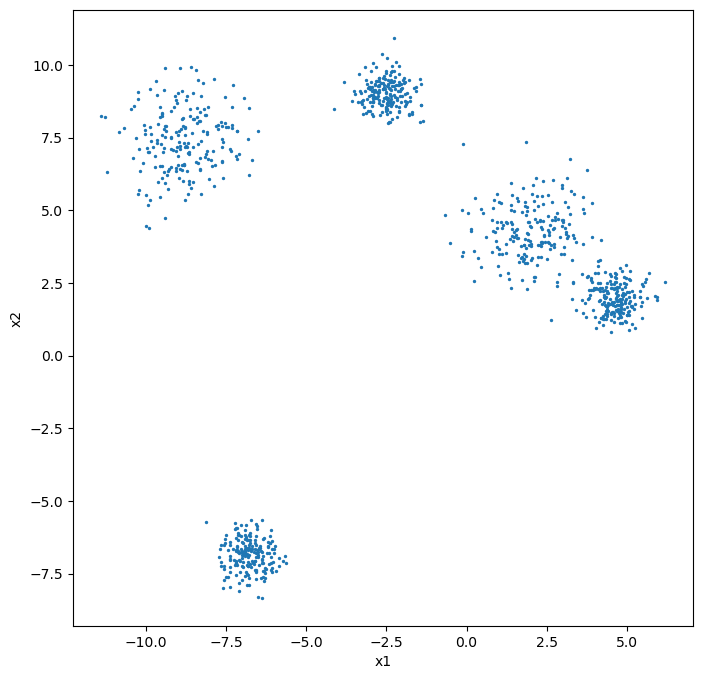

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], s=2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Lets now train our K-means algorithm on this dataset.

In [4]:
from sklearn.cluster import KMeans

In [5]:
k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)

Note that you have to specify the number of clusters $k$ that the algorithm must find. In this example, it is pretty obvious from looking at the data that $k = 5$. However in general it is not that easy. We will look into the process to choose the right number of clusters later.

Each instance was assigned to one of the five clusters. In the context of clustering an instance's **label** is the index of the cluster that the instance gets assigned to by the algorihtm. THis is not to be confused with the class labels in classification (remember that clustering is an unsupervised learning task).  The KMeans instance preserves a copy of the labels of the instances it was trained on, available via the labels_ instance variable. The labels_ variable contains the index of the cluster that each instance was assigned to. For example, the first instance was assigned to cluster 1, the second instance was assigned to cluster 4, and so on. The KMeans instance also preserves the location of the centroids of each cluster, available via the cluster_centers_ variable. The cluster_centers_ variable contains the location of the centroid of each cluster. For example, the centroid of cluster 0 is located at [-0.6, 2.8], the centroid of cluster 1 is located at [0.1, 4.2], and so on.

In [6]:
y_pred[:5]

array([0, 0, 2, 0, 4], dtype=int32)

In [7]:
y_pred is kmeans.labels_

True

Remember we have used fit predict that is we have trained and predicted on X.

In [8]:
kmeans.cluster_centers_

array([[ 4.57925901,  1.98967321],
       [-2.50804399,  9.02008423],
       [-6.78296705, -6.84575207],
       [-8.82326814,  7.40132883],
       [ 1.95897075,  4.33065786]])

We can easily assign new instances to the cluster whose centeroid is closest to the instance. This is called **hard clustering**. However, we can also measure the distance between each instance and the centroid of each cluster. This is called **soft clustering**. The KMeans class uses hard clustering by default, but if you set the **n_init** hyperparameter to a value greater than 1 (e.g., 10), then it will run the algorithm 10 times with different random initializations and keep the best solution. This is called **k-means++**. The k-means++ algorithm is a variant of the k-means algorithm that tries to select the initial centroids to be as far apart from each other as possible. This generally leads to a better solution.

Hard clustering is method to grouping the data items such that each item is only assigned to one cluster, K-Means is one of them. While Soft clustering is method to grouping the data items such that an item can exist in multiple clusters, Fuzzy C-Means (FCM) is an example. That is in hard clustering instances belong to a **single cluster** while in soft clustering instance may belong to several clusters with **varying degrees** of membership in each.

Lets now assign new instances in the cluster to whose centroid is the closest.

In [9]:
import numpy as np

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([4, 0, 4, 4], dtype=int32)

Lets now plot the decision boundaries

In [11]:
# Plotting decision regions
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

In [12]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

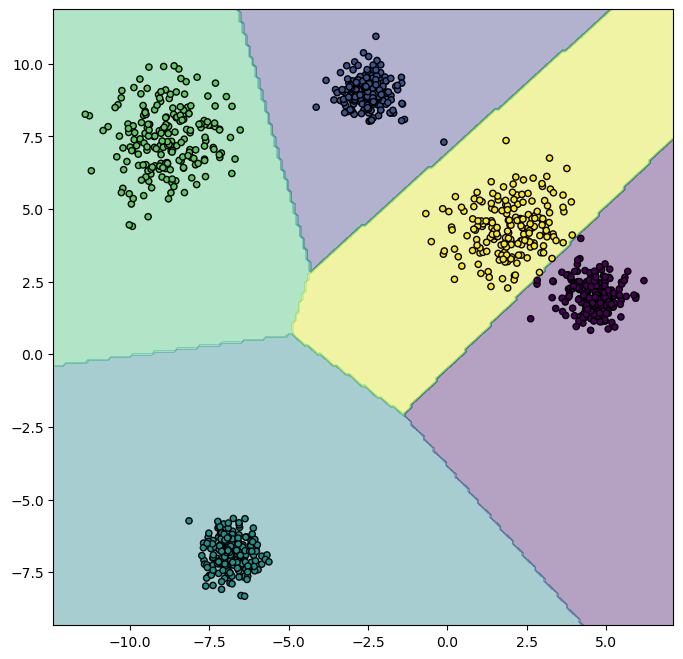

In [13]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=20, edgecolor='k')
plt.show()

All KMeans cares about is the distance between instances and the centroids. Instead of assigning each instance to a cluster (hard clustering) it's better to give a per-instance cluster score (soft clustering). The score can be the distance between the instance and the centroids (this can also be a good dimensionality reduction technique).

In sklearn, the transform method measures the distance between each instance and the centroids.

In [14]:
kmeans.transform(X_new)

array([[ 4.57927065,  7.45465407, 11.14701627, 10.34526045,  3.04459069],
       [ 1.57929277,  8.92301133, 13.18915365, 12.99861618,  2.55258849],
       [ 7.64630154,  6.04015189, 10.54749608,  7.29946213,  5.13439784],
       [ 7.59642024,  6.53861752, 10.08235694,  7.61140435,  5.28608542]])

In the example given above the first instance is 4.57 from the first centroid, 7.45 from the second and so on. If you have a high dimensional dataset and you transform it this way you end up with a $k$-dimensional dataset: this transformation can be very effficient non linear dimensionality reduction technique.

#### 1.1.1 K-Means Algorithm

So how does the K-Means algorithm work? If you were given the centroids, then you could easily assign labels to the instances based on which centroid is closest to them, if however you were given the labels instead you could find the centroid as the mean of instances with those labels. However in this scenario we neither have the centroids nor the labels so how do we find them? 

First we assign centroids, the number of centroids is equal to the number of clusters. We then randomly initialise the value of the centroids. After we do this we have positions for all the centroids, we use these then to label the instances (closest to centroid). We then update the centroids by taking the mean of all the instances assigned to that centroid. We then repeat this process until the centroids stop moving (that is their position updates are very small). The algorithm is guaranteed to converge in a finite number of steps (this is because the mean squared distance between instances and their closest centroid can only go down at each step), but it may converge to a local optimum, not the global optimum (this is because the algorithm is very sensitive to the initial values chosen for the centroids).

The computational complexity of the algorithm is $O(kmn)$ where $m$ is the number of instances, $n$ is the number of features, and $k$ is the number of clusters. This is a linear complexity in the number of instances and features, but it is quadratic in the number of clusters. This means that the algorithm will not scale well if you have a large number of clusters. However, it is very fast when the number of clusters is small (e.g., 10 or 20). In fact, it is one of the fastest clustering algorithms available.

As stated earlier the algorithm is guaranteed to converge, it may not however convrge to the right solution (may converge to local optimum), whether it does or not depends on the centroid initialisation. THe following figure shows two suboptimal solutions that the algorithm can converge to if you are not lucky with random initialisation step.

<br>
<center>
<img src="https://img-blog.csdnimg.cn/202005041551207.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L0xpbmxpNTIyMzYyMjQy,size_16,color_FFFFFF,t_70" width="500">
</center>
<br>

#### 1.1.2 Centroid Initialisation Methods

If you happen to know approximately where the centoirds should be e.g.if you ran another clustering algirhtm earlier, then you can set the init hyperparamter to a NumPy array containing the list of centroids and set n_init to 1. This will skip the random initialisation step and jump straight to the centroids you specify. This can speed up convergence quite a bit.

In [15]:
good_init = np.array([[-3, 3], [-3, 2.5], [-3, 2], [0, 2], [3, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3. ,  3. ],
       [-3. ,  2.5],
       [-3. ,  2. ],
       [ 0. ,  2. ],
       [ 3. ,  2. ]]),
       n_clusters=5, n_init=1, random_state=42)

Another solution is to run the algorithm multiple times with different random initialisations of the centroids and keep the best solution. The number of random initialisations is controlled by the n_init hyperparameter (its default value is 10), which means the algorithm stated earlier is run a total of 10 times when you call fit(), and sklearn keeps the best solution. The question that arises though is how does it know which solution is th best (because there are no labels to compare the solutions against). The metric used is called the models **inertia**, which is the mean squared distance between each instance and its closest centroid. It is roughly equal to 223.3 for model on the left that was given in the earlier diagram and 237.5 for the one on the right. THe KMeans class runs the algorithm n_init times and keeps the model with the lowest inertia. A models inertia is accesible via the inertia_ instance variable.

In [16]:
kmeans.inertia_

5247.047895460968

The score() method actually returns the opposite of the inertia, so the higher the score, the lower the inertia. Why is it negaive you may ask, because a predictions score() method must always respect the Sklearns greater is better rule: if  apredictor is better than another then its score() method must return a greater score.

In [17]:
kmeans.score(X)

-5247.047895460968

Another important improvement to the K-Means algorithm, is the **K-Means++** algorithm. This introudced a smarter initialisation step that tends to select centroids that are distant from one another, and this improvement makes the K-Means algorithm much less likely to converge into a suboptimal solution. It showed that te additional computation required to find the best initial centroids is well worth it, becuase it makes it possible to drastically reduces the number of times the algorithm needs to run to find optimal solution.

The K-Means++ algorithm is as follows: -

1. Take one centroid $C^{(i)}$, chosen randomly from the dataset.
2. Take a new centroid $C^{(i+1)}$, choosing an instance $x^{(i)}$ with probability $D(x^{(i)})^2 / \sum \limits_{j=1}^{m} D(x^{(j)})^2$, where $D(x^{(i)})^2$ is the distance between $x^{(i)}$ and the closest centroid that has already been chosen. This probability distribution ensures that the instances further away from already chosen instances are more likely to be chosen as centroids.
3. Repeat step 2 until all $k$ centroids have been chosen.

The KMeans class uses the K-Means++ algorithm by default, but you can set the init hyperparameter to "random" to use the random initialisation method instead. The KMeans class also has a tol hyperparameter that lets you specify the tolerance with which the centroids must move at each iteration for the algorithm to continue (its default value is 0.0001). If the centroids move less than that at an iteration then the algorithm stops. This is another way to control the number of iterations.

#### 1.1.3 Accelerated K-Means and Mini-Batch K-Means

Another important improvement to the K-Means algorithm is a method that is used to considerably accelerate the algorithm by avoiding many unnecessary distance calculations. This was achieved by exploiting the triangle inequality: (i.e. a straight line is always the shortest distance between two points. Triangle inequality is $AC \le AB + BC$, where $A$, $B$, $C$ are three points and $AB$, $AC$, $BC$ are the distances between these points) and by keeping track of lower and upper bounds for distances between instances and centroids. This is the algorithm the KMeans class uses by default (you can force it to use the original algorithm by setting the algorithm hyperparameter to "full", you will probably never have to do this though).

Another important variant of the K-Means algorithm is the Mini-Batch K-Means. Instead of using rhe full dataset at each iteration, the algorithm is capable of using mini-batches, moving the centroids just slightly at each iteration. This speeds up the algorithm typically by a factor of three or four and makes it possible to cluster huge datasets that do not fit in memory. The MiniBatchKMeans class works exactly like the KMeans class, except that you can set the batch_size hyperparameter to control the size of the mini-batches. Implementation is as given below:


In [18]:
from sklearn.cluster import MiniBatchKMeans

In [19]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, n_init=3, random_state=42)

If the dataset does not fit in memory, the simplestoption is to use the memmap clas,as we did for incremental PCA. Alternatively you can pass one mini-batch at a time to the partial_fit() method, this howevever will require much more work, since you will need to perform multiple initialisations and select the best one yourself.

Even though the Mini-Batch K-Means algorithm is much faster than the regular K-Means algorithm, its inertia is generally slightly worse, especially as the number of clusters increase. This can be seen in the figure given below, where the plot on the left compares the inertias of Mini-batch K-Means and regular K-Means models trained on the previous dataset using various numbers of clusters $k$. The difference becomes more and more significant as $k$ increases.

<br>
<center>
<img src="https://nbviewer.org/github/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/static/imgs/inretia_speed.png" width="500">
</center>
<br>

#### 1.1.4 Finding the optimal number of clusters

Till now we have set the number of clusters $k$ to 5 becuase it was obvious just by looking at the data, however this will not always be case, sometimes it can be difficult to intuitively guess what value should set for $k$. The result could be quite bad if you set $k$ to the wrong value. It would result in fairly bad models. 

You could think that we could just pick the model with the lowest inertia, this howeer would not work, this is because inertia keeps getting lower as we increase k. The reasoning behind this is that as the number of clusters increase, the instances will be closer to the closest centroid and therefore the lower the inetia will be. We will now see a plot of the inertia as a function of the number of clusters $k$, the curve often contains an inflection point called **elbow point**. The elbow point is where the inertia begins to decrease more slowly, and this is a good indication that adding more clusters will not help much. The figure given below shows the inertia as a function of the number of clusters $k$ for the previous dataset. The elbow point is clearly visible at $k=5$.

<br>
<center>
<img src="https://nbviewer.org/github/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/static/imgs/k_to_inretia.png" width="500">
</center>
<br>

As you can see the inertia drops very quickly as we increase $k$ up to 4, but then it dcereases much more slowly as we keep increasing k. This curve has roughly the shape of an arm, and there is an **elbow** at $k=4$. This is why this method is called the **elbow method**. So a good choice is to take this value of $k$. Any lower value would be dramatic while any higher value would not help much and we might just be splitting perfectly good clusters in half for no good reason.

The technique for choosing the best value for the number of clusters is rather coarse. A more precise approach (but also more computationally expensive) is to use the **silhouette score** which, is the **mean silhouette coefficient** over all the instances. An instances silhouette coefficient is equal to $(b-a)/max(a,b)$, where $a$ is the mean distance to the other instances in the same cluster, and $b$ is the mean distance to the instances in the next closest cluster. The silhouette score is the mean of all the instances silhouette coefficients. The silhouette score ranges from -1 to 1, where a high score indicates that the instance is well inside its own cluster and far from other clusters, while a score close to 0 indicates that the instance may be either on or very close to the decision boundary between two clusters, and a score close to -1 indicates that this instance may have been assigned to the wrong cluster. The figure given below shows the silhouette score as a function of the number of clusters $k$ for the previous dataset. The silhouette score is highest when $k=5$, which is the same as the elbow point.

To compute the silhouette score, you can sklearns silhoueete_Score() function, giving it all the instances in the dataset and the labels they were assigned.

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(X, kmeans.labels_)

0.5369014403941273

Comparing the silhouette score for different numbers of clusters:

In [22]:
scores = list()
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(X)
    scores.append(silhouette_score(X, kmeans.labels_))
    del(kmeans)

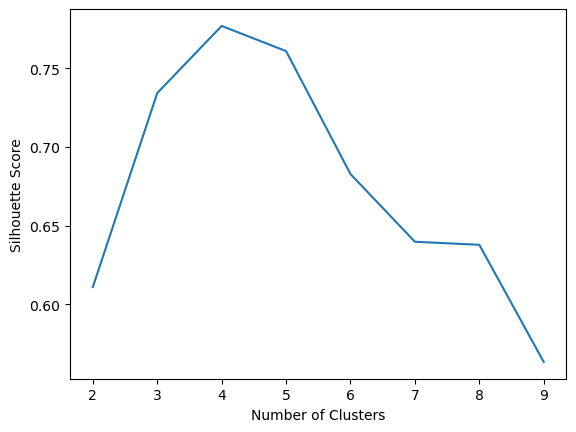

In [23]:
plt.plot(list(range(2, 10)), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

As you can see this visualization is much more precise than the elbow method, and it shows that the best value for $k$ is 4. However, it is also much more computationally expensive, so you may want to prefer the elbow method if speed is important, it also underlines the fact that $k = 5$ is quite good as is much better than $k = 6$ or $k = 7$. This was not visible when comparing inertias.

An even more informative visualisation is obtained when you plot every instances silhouette coefficient, sorted by the cluster they are assigned to and by the value of the coefficient. This is called a **silhouette diagram**. Each diagram contains one knife shape per cluster. The shapes heoight indicates the number of instances the cluster contains, and its width represents the sorted silhouette coefficients of the instances in the cluster (wider is better).The dashed line represents the mean silhouette coefficient over all the instances. 

<br>
<center>
<img src="https://nbviewer.org/github/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/static/imgs/silhouette_diagram.png" width="500">
</center>
<br>

The vertical dashed lines represent the silhouette score for each number of clusters. When most of the instances in a cluster have a lower coefficient than this score (i.e. if many instances top short of the dashed line, ending to the left of it), then the cluster is rather bad since this means its instances are much close to other clusters. We can see that when $k = 3$ and when $k = 6$, we get bad clusters. But when $k = 4$, or $k = 5$, we get good clusters: most instances extend beyond the dashed line, to the right and closer to 1.0. When $k = 4$, the cluster at index 1 (the third from the top) is rather big (we already know this is not good, should be more uniform). When $k = 5$, all clusters have similar sizes. SO even though the overall silhouette score from $k= 4$ is slightly greater than for $k = 5$, it seems like a good idea to use $k = 5$ to get clusters of similar sizes.

#### 1.1.5 Limitations of K-Means

Despite the many merits of K-Means, such as being fast and reliable, K-Means is not perfect. As we saw it is necessary to run the algorithm several times to avoid suboptimal solutions, plus you need to specify the number of clusters, which can be quite a hassle. Moreover, K-Means does not behave very well when clusters have varying sizes, different densities, or nonsperical shapes. For example if would not properly be able to cluster a dataset containing ellipsoidal clusters of different dimensions, densities and orientations.

In scenarios like this where you are working with types of elliptical clusters, Gaussian Mixture Models are a better choice. They are more flexible than K-Means and can cluster any shape of cluster. However, they are much slower than K-Means, and they make more assumptions about the shape of the clusters.

It is also important to scale the input features before you run K-Means, or the clusters may be very stretched and K-Means will perform poorly. Scaling the features does not guarantee that all clusters will be nice and spherical, but it generally improves things.

We will now look at ways we can use K-Means.

#### 1.1.6 Using Clustering for Image Segmentation

**Image segmentation** is the task of paritioning an image into multiple segments. In **semantic segmentation**, all pixels that are part of the same object type get assigned to the same segment. For example, in a self driving cars vision system, all pixels that are part of a pedestrian image may be assigned to the "pedestrian" segment (there would be one segment containing all the pedestrians). In **instance segmentation**, all pixels that are part of the same individual object are assigned to the same segment. For example, in this case, each pedestrian would be assigned to its own segment. The state of the art in semantic or instance segmentation today is achieved using complex architectures based on convolutional neural networks (CNNs). Here we are going to do something much simpler: **color segmentation**. This is a simple technique that works by assigning each pixel to the segment that is the closest in color. This is a very fast and easy technique, but it works surprisingly well in many cases. In some applications this may be sufficient. For example, if you want to analyse satellite images to measure how much total forest area there is in a region, cikir segmentation may be sufficient.

First we will use Matplotlibs imread() function to load the image.

In [24]:
from matplotlib.image import imread

In [25]:
image = imread('images/flower.png')
image.shape

(449, 669, 4)

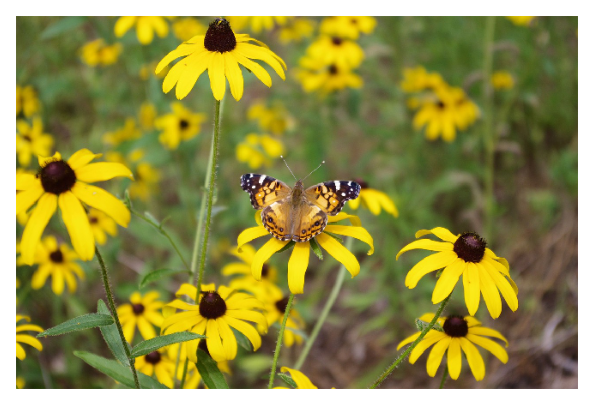

In [26]:
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

The image is represented as a 3D array. The first two dimensions represent the image's height and width, and the third dimension represents the color channels: red, green, and blue. In other word for each pixel there is a 3D vector containing the intensities of red, green, blue each between 0.0 and 1.0 (or between 0 and 255 if you use imageio.imread()). Some images may have fewer channels, such as grayscale images, which only have one channel. And some images may have more channels, such as an image with an alpha channel for transparency, or satellite images which often contain many light frequencies (e.g. infrared). The following code reshapes the array to get a long list of RGB colors, then it clusters these colors using K-Means.

In [27]:
X = image.reshape(-1, 3)
X.shape

(400508, 3)

In [28]:
kmeans = KMeans(n_clusters=12, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

For example it may identify a color cluster for all shades of green. Next for each color (e.g. dark green), it looks for the mean clor of the pixels coor cluster for example all shades of green may be replaced with the same light green color (assuming the mean colorof the green cluster is light green). Finally, it reshapes this long list of colors to get the same shape as the original image.

You can experiment with various numbers of clusters as shown in the figure. When you use fewer than eight clusters, you will notice the ladybugs flashy red color, fails to get a cluster of its own: it gets meged with colors from the enviorment. This is because K-Means prefers to get clusters of similar sizes. The ladybug is small - much smaller than the rest of the image - as a result even if the color is flashy, K-Means fails to dedicate a cluster to it.

In [29]:
segmented_img = segmented_img.reshape(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


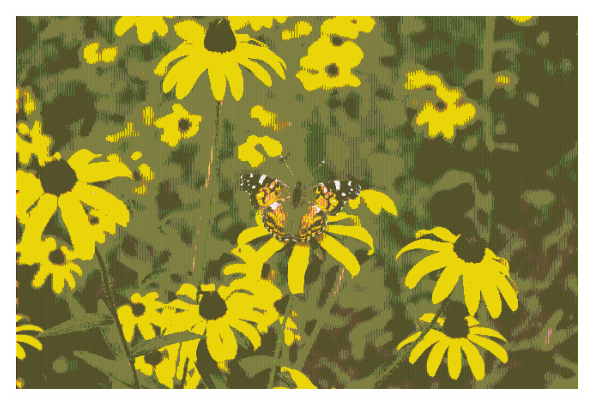

In [30]:
plt.figure(figsize=(10, 5))
plt.imshow(segmented_img)
plt.axis('off')
plt.show()

Now we will look into another application of clustering: **preprocessing**.

#### 1.1.7 Using Clustering for Preprocessing

Clustering can be an efficient approach to dimensionality reduction, i particular as a preprocessing step before a supervised learning algorithm. As an example of using clustering for dimensionality reduction. Lets tackle the digits dataset which is a simple MNIST-like dataset containing 1,797 grayscale 8x8 images representing the digits 0 to 9. First we will load the dataset:


In [31]:
from sklearn.datasets import load_digits

In [32]:
X_digits, y_digits = load_digits(return_X_y = True)

Splitting dataset into train and test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)

Fit a Logistic Regression model:

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/Users/rishabhrao/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
log_reg.score(X_test, y_test)

0.9694444444444444

This is our baseline models performance: 96.94% accuracy. Ltes see if we can do better by using K-Means as a preprocessing step. We will create a pipeline that will frst cluster the training set into 50 clusters and replace the images with their distances to these 50 clusters.

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters=50, n_init=10)),
    ('log_reg', LogisticRegression())
])
pipeline.fit(X_train, y_train)

/Users/rishabhrao/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, n_init=10)),
                ('log_reg', LogisticRegression())])

You may wonder why we set clusters to 50 even though there are only 10 digits in total, this is because each digit can be written in many different ways.

In [40]:
pipeline.score(X_test, y_test)

0.9722222222222222

As you can see the performance has definitely improved. We can however improve this as well, we will use GridSeach to find the best parameter value for number of clusters. Since k-means is ust a preprocessing step in a classification pipeline, finding a good value for $k$ is much simpler than earlier. There is no need to perform silhouette analysis or minimise the inertia, the best value of $k$ is simply the one that results in the best classification performance during cross-validation. We can simply try a few values and see which one works best. We can use GridSearchCV to find the optimal number of clusters.

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
# param_grid = dict(kmeans__n_clusters=range(2, 100))
# grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
# grid_clf.fit(X_train, y_train)
# print(grid_clf.best_params_)
# print(grid_clf.score(X_test, y_test))

#### 1.1.8 Using Clustering for Semi-Supervised Learning

Clustering can also be used in a semi-supervised learning, when we have plenty of unlabelled instances and a few labeled instances. Lets train a Logistic Regression model on a sample of 50 labeled instances from the digits dataset.

In [43]:
n_labeled = 50
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

/Users/rishabhrao/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
log_reg.score(X_test, y_test)

0.8277777777777777

Accuracy is only 82.7% which is lower than before this however is not surprising as we had earlier trained the model on the full training dataset. Lets see how we can do better. First we will cluster the training set into 50 clusters. Then for each cluster lets find the image closest to the centroid. We will call these images the **representative images**.

In [45]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

/Users/rishabhrao/opt/miniconda3/envs/ml/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Let's look at each image and manually label it:

In [46]:
y_representative_digits = y_train[representative_digit_idx].copy()

Now we have a dataset with just 50 labeled instances, but instead of being random instances, each of them is a representative image of it cluster.

Let's see if the performance is any better:

In [47]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_representative_digits, y_representative_digits)


LogisticRegression(solver='liblinear')

In [48]:
log_reg.score(X_test, y_test)

0.9138888888888889

We've made a big jump in performance even though we are still training using the same number of data points. We could only do this by manually labelling representative instances. We get representative instances by running unsupervised clustering (k clusters) and taking the k instances closest to each of centroids.

However, what if we propagated the labels to all the other instances in the same cluster, this is called label propagation:

In [49]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

We will now train the model and look at the performance

In [50]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9166666666666666

We've got a reasonable boost but nothing really astounding.

The problem is that we propagared each representative instances label to all the instances in the same cluster, including the instances located close to the cluster boundaries, which are more likely to be mislabeled.

Let's see what happens if we only propagate the labels to the 20
 of the instances that are closest to the centroids:

In [51]:
percentile_closest = 20.

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

In [52]:
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)

In [53]:
X_train_partially_propagated = X_train[partially_propagated]


In [54]:
y_train_partially_propagated = y_train[partially_propagated]


Now let's train the model on this partially propagated dataset:

In [55]:
log_reg = LogisticRegression(solver='liblinear', multi_class='auto')
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9305555555555556

**ACTIVE LEARNING:**

To continue improving your model and your training aet, the next step could be to do a few rounds of **active learning**, which is when a human expert interacts with the learning algorithm, providing labels for specific instances when the algorithm requests them. There are many different strategies for active learning but one of the most common ones is called **uncertainty sampling**. This is how it works: -
1. The model is trained on the labeled instances gathered so far, and this model is used to make predictions on the unlabeled instances.
2. THe instances for which the model is most uncertain (i.e. when its estimated probability is lowest) are presented to the human expert for labeling.
3. You iterate this process until the performance improvement stops being worth the labeling effort.

Other strategies include labeling the instances that would result in the largest model change, or the largest drop in the models validation error, or the instances that different models disagree on (e.g. an SVM or a Random Forest).

<br>

This completes the subsection on K-Means. In the next section we will look at another popular clustering algorithm: **DBSCAN**, that illustrates a very different approach based on local density estimation. This approach allows the algorithm to identify clusters of arbitary shapes.

### 1.2 DBSCAN

DBSCAN stands for **Density-Based Spatial Clustering of Applications with Noise**. This algoithm defines clusters as continuous regions of high density. It is very good at identifying clusters of arbitary shapes, even if they are of different sizes and densities. It is also capable of identifying clusters that are nested within other clusters, and it can even detect outliers (i.e. instances that are not part of any cluster). It works in the following way: -

1. For each instance, the algorithm counts how manny instances are localed within a small distance $\epsilon$ from it. This region is called the instance's *$\epsilon$ neighborhood*.
2. If an instance has at least *min_samples* instances in its $\epsilon$-neighborhood (including itself) then it is considerd a **core instance**. In other words, core instances are those that are located in dense regions.
3. All instances in the neighborhood of a core instance belonng to the same cluster. This neighborhood may include other core instances; therefore a long sequence of core instances forms a single cluster.
4. Any instance that is not a core instance and does not have one in its neighborhood is considered an **anomaly**.

This algorithm works well if all the clusters are dense enough and if they are well seperately by low-density regions. The DBSCAN class in Scikit-Learn is as simple to use as expected. We will now test it on the moons dataset.

In [56]:
from sklearn.datasets import make_moons

In [57]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

The labels of all the instances are now available via the labels_ instance variable.

In [60]:
dbscan.labels_

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5,  2,  3,  0,  2,  2,  2,  4,
        2,  2,  4,  0,  5,  1,  0,  5,  5,  3,  2,  2,  2,  4,  5,  0,  6,
        1, -1,  0,  0,  2,  3, -1,  3,  4, -1,  4,  4,  2,  0,  6,  2,  0,
        2,  4,  0,  3,  3,  0,  3,  5,  2, -1,  3,  0,  5,  0,  0,  0,  2,
        3,  0,  3,  6,  0,  2,  4,  4,  0,  3,  0,  4,  0,  3, -1,  3,  4,
        0, -1,  2,  2,  4,  1,  6,  0,  5,  2,  6,  2,  3,  3, -1,  2, -1,
        2,  4,  0,  0,  0,  2,  5,  2,  0,  2, -1,  2,  3,  1,  5,  2,  0,
        4,  2,  1,  2,  4,  4,  0,  0,  6,  2,  2,  0,  2, -1,  2,  0,  3,
        3,  5, -1,  3,  3,  5,  2,  4,  2,  2,  2,  4,  2,  4,  0, -1,  2,
        1,  2,  6,  4,  2,  3,  2, -1,  2,  0,  0,  2,  0,  4,  0,  4,  4,
        1,  6,  3,  2,  6,  1,  4,  4,  2,  0,  6,  0,  1,  0,  2,  5,  1,
        1,  2,  2,  2,  2,  0,  5,  5,  1,  4,  5,  0,  3,  3,  0,  0,  0,
        2,  0,  5,  2, -1,  2,  3,  5,  2,  2,  0,  4,  0,  4,  2,  2,  4,
        2,  2,  3,  2,  3

Notice that some instances have a cluster index = -1, which means that hey are considered anomalies by the algorithm. The indices the indices of the core instances are available in the core_sample_indices_ instance variable, and the core instances themselves are available in the components_ instance variable.

In [61]:
len(dbscan.core_sample_indices_)

808

In [62]:
dbscan.core_sample_indices_

array([  0,   4,   5,   6,   7,   8,  10,  11,  12,  13,  14,  16,  17,
        18,  19,  20,  21,  22,  23,  24,  25,  26,  28,  29,  30,  31,
        32,  33,  34,  36,  38,  39,  41,  42,  44,  45,  47,  49,  50,
        51,  52,  53,  54,  55,  56,  58,  59,  61,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84,  85,  87,  88,  89,  90,  91,  93,  94,  96,
        97,  98, 102, 103, 104, 105, 106, 107, 108, 109, 110, 113, 114,
       115, 116, 117, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 135, 136, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149,
       150, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 172, 173, 174, 175, 176, 177, 178,
       179, 181, 182, 183, 185, 186, 187, 188, 189, 191, 193, 194, 195,
       196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 215, 216, 217, 218, 219, 221, 222, 22

Lets now visualise our clusters:

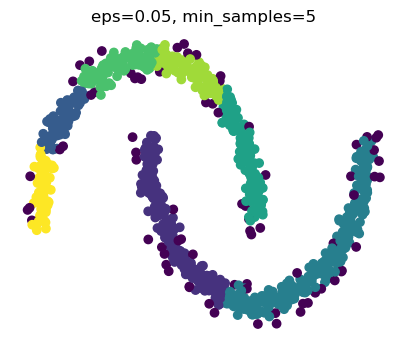

In [63]:
plt.figure(figsize=(5, 4))
plt.title('eps=0.05, min_samples=5')
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.axis('off')
plt.show()

As seen in the plot above it identified a lot of anomalies, and seven different clusters. Lets try to widen each instances neighborhood by increasing the eps to 0.2.

In [64]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.2)

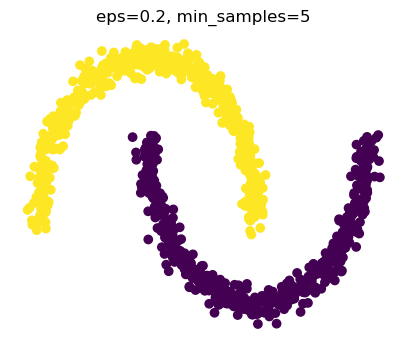

In [65]:
plt.figure(figsize=(5, 4))
plt.title('eps=0.2, min_samples=5')
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_)
plt.axis('off')
plt.show()

The DBSCAN class does not have a predict() method, although it has a fit_predict() method. In ther words, it cannot predict which cluster a new instance belongs to. This implementation decision was made because because different classification algorithms can be beteer for different tasks, so the authord decided to let the user choose which one to use. It is also not hard to implement. Given below is an implementation using KneighborsClassifier:

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

Now given a few instances we can predict which cluster they most likely belong to and even estimate a probability for each cluster.

In [68]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0])

In [69]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

Note we only train the classifier on the core instances but we could have also trained it on all the instances, or all but the anomalies: this choice depends on the final task.

Since there is no anomaly in the training set,the classifier always chooses a cluster, even when that cluster is far away. It i fairly straight forward to introduce a maximum distance, in which case the two instances that are far away from both clusters are classified as anomalies. To do this, use the keighbors() method of the KneighborsClassifer. Given a set of instances, it returns the distances and the indices of the nearest k-neighbors in the training set (two matrices) each with k columns.

In [70]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1])

In short, DBSCAN is a very simple yet powerful algorithm capable of identifying any number of clusters of any shape. It is robust to outliers and has just two hyper-parameters (eps and min_samples).

If the densities vary significantly across the clusters, it can be impossible for it to capture all the clusters properly. Its computational complexity is roughly $O(m\log(m))$ making it pretty close to linear regarding the number of instances. However, its sklearn implementation can require up to $O(m^2)$ in memory if eps is large.

You might also want to try using Hierarchal DBSCAN(HDBSCAN), which is a variant of DBSCAN that can identify clusters of different sizes and densities. It is also capable of identifying clusters that are nested within other clusters. It is available in the hdbscan package.

### 1.3 Other Clustering Algorithms

There are many other clustering algorithms available in Scikit-Learn. Some of the most popular ones are: -

1. Agglomerative clustering - a hierarchy of clusters is built from the bottom up. Think of many tiny bubbles floating on water and gradually attaching to each other until theres one big group of bubbles. Similarly at each iteration, agglomerative clustering connects the nearest pair of clusters (starting with individual instances). If you drew a tree with a branch for every pair of clusters that merged, you would get a binary tree of clusters, where the leaves are the individual instances. This approach scales very well to a large numbers of instances or clusters. It can capture clusters of various shapes, it produces flexible and informative cluster tree instead of forcing you to choose a particulr cluster scale, it can be used with any pairwise distance. It can scale nicely to a large number of instances if yo provide a connectivity matrix, which is a sparse $m \times m$ that indicates a pair of instances are neighbors (e.g returned by sklearn.neighbors.kneighbors_graph()). Without a connectivity matrix, the algorithm does not scale well to large datasets.

2. BIRCH - The BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies) algorithm was designed specifically for very large datasets and it can be faster than the batch K-Means, with similar results, as long as the number of features is not too large (<20). During the training, it builds a tree strucutre containing just enough information to quickly assign each new instance to a cluster without having to store all the instances in the tree: this approach allows it to use limited memory, while handling huge datasets.

3. Mean-Shift - This algorithm starts by placing a circle centered on each instance; then for each circle it computes the mean of all the instances located within it and it shifts the circle so that it is centered on the mean. Next it iterates this mean-shifting step until all the circles stop moving (i.e until each of them is centered on the mean of the instances it contains). Mean Shift shifts the crcles in the direction of higher density until each of them has found a local density maximum. Finally all the instances whose circles have settled inn the same place (or close enough) are assigned to the same cluster. Mean-Shift has some of the features as DBSCAN, like how it can find any number of clusters of any shape, it has very few hyperparameters (just one - the radius of the circles, called the bandwith), and it relies on local density estimation. But unlike DBSCAN, Mean-Shift tends to chop clusters into pieces hen they have internal density variations. Unfortunately the computational complexity is $O(m^2)$, so it is not suited for large datasets.

4. Affinity Propogation - this algorithm uses a voting system, where instances vote for similar instances to be their representatives, and once the algorithm converged each representative and its voters form a cluster. Affinity propogation cn detect any number of clsters of different sizes. Unfortunately this algorithm has a computational complexity of $O(m^2)$, so it is not suited for large datasets.

5. Spectral Clustering - this algorithm takes a similarity matrix between the instances and creates a low dimensional embedding from it (i.e. it reduces its dimensionality), then it uses another clustering algorithm in this low dimensional space (Scikit-Learns implementation uses K-Means). Spectral clustering can capture complex cluster structures and it can also be used to cut graphs (e.g. to identify clusters of friends on a social network). It does not scale wellto a large number of instances, and it does not behave well when the clusters are of different sizes.

We will now look into Gaussian Mixture Models, which can be used for density estimation, clustering and anomaly detection.

## 2. Gaussian Mixture Models

A *Gaussian mixture model (GMM)* is a probablistic model that assumes that the instances were generated from a mixture of several Gaussian distributions whose parameters were unknown. All the instances that are generated froma  single Gaussian distribution form a cluster that typically looks like an ellipsoid. Each cluster can have a different ellipsoidal shape, size, density and orientation. When you observe an instance, you know it was generated from one of the Gaussian distributions but you were not told which one, and you do not know what the parameters of these distributions are.

There are several GMM variants. In the simplest variant, implemented in the GaussianMixture class, you must know in advance the number *k* of Gaussian distributions. The dataset X is assumed to have been generated through the following probabilistic process.

* For each instance, a cluster is picked randomly from among the *k* clusters. The probability of choosing the $j^{th}$ cluster is defined by the clusters weight, $\phi^{(j)}$. THe index of the cluster chosen for the $i^{th}$ instance is noted $z^{(i)}$.

* If $z^{(i)} = j$, meaning the $i^{th}$ instance has beeen assigned to the $j^{th}$ cluster, the location $x^{(i)}$ of this instance is sampled randomly from the Gaussian distribution with the mean $\mu^{(j)}$ and covariance matrix $\sum^{(j)}$. This is noted as $x^{(i)} ~ N (\mu^{(j)}, \sum^(j))$.

This generative process can be represented as a graphical model. Following figure represents the structure of the conditional dependencies between random variables.

<center><img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/Gaussian_mixtures.png" height=350></center>

Here is how to interpret the figure:

* The circles represent random variables
* The squares represent fixed values (i.e., parameters of the model)
* The large rectangles are called plates. They indicate that their content is repeated over several times.
* The number at the bottom right of each plate indicates how many times its content is repeated. So, there are $m$ random variables $z^{(i)}$ (from $z^{(1)}$ to $z^{(m)}$) and $m$ random variables $x^{(i)}. There are also $k$ means $\mu^{(j)}$ and $k$ covariance matrices $\sum^{(j)}$. Lastly there is just one weight vector $\phi$ (containing all the weights $\sum^{(1)} to $\sum^{(k)}).
* Each variable $z^{(i)}$ is drawn from the *categorical distribution* with weight $\phi$. Each variable $x^{(i)}$ is drawn from the normal distribution with the mean and covariance matrix defined by the cluster $z^{(i)}.
* The solid arrow represent conditional dependencies. For example, the probability distribution for each random variable $z^{(i)}$ depends on the weight vector $\phi$. Note that when an arrow crosses a plate boundary, it means that it applies to all the repetitons of the plate. For example the weight vector $\phi$ conditions the probability distribution of all the random variables $x^{(1)}$ to $x^{(m)}$.
* The squiggly arrow from $z^{(i)}$ to $x^{(i)}$ represents a switch: depending on the value of $z^{(i)}$, the isntance $x^{(i)}$ will be sampled from a different gaussian distribution. For eample if $z^{(i)} = j$, then $x^{(i)} ~ N (\mu^{(j)}, \sum^(j))$.
* Shaded nodes indicate that the value is known. SO in this case only the random variables $x^{(i)}$ have known values: they are called *observed variables*. The unknown variables are called *latent variables*.

The question arises as to what we can do with such a model? Given the dataset $X$, you typically want to start by estimating the weights $\phi$ and all the distribution parameters $\mu^{(1)}$ to  $\mu^{(k)}$ and $\sum^{(1)}$ to $\sum^{(k)}$. Sklearns GaussianMixture class makes this super easy:

In [71]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [72]:
print(f"Weights:\n {gm.weights_}\n")
print(f"Means:\n {gm.means_}\n")
print(f"Covariances:\n {gm.covariances_}\n")

Weights:
 [0.20846456 0.20352296 0.58801248]

Means:
 [[ 1.73139197 -0.0687895 ]
 [-0.74739902  0.55611538]
 [ 0.49392194  0.25478715]]

Covariances:
 [[[ 0.06092047  0.06554928]
  [ 0.06554928  0.08769601]]

 [[ 0.05368744  0.06215896]
  [ 0.06215896  0.08993529]]

 [[ 0.16423007 -0.09776417]
  [-0.09776417  0.28773664]]]



Now we know that it worked fine, the weights were used to generate the data were 0.2, 0.6, 0.2 and similarly the covariances are very closes to those found by the algorithm, you may wonder how this is possible. The class relies on the Expectation-Maximization (EM) algorithm, which has many similarities with the K-Means algorithm: it also initialises the cluster parameters randomly then it repeats two steps until convergence, first assigning instances to the clusters (this is called the *expectation* step) and then updating the clusters (this is called the *maximisation* step). In the context of clustering you can think of EM as a generalisation of K-Means that not only finds the cluster centers ($\mu^{(1)}, \mu^{(k)}$) but also their size, shape, and orientation($\sum^{(1)}, \sum^{(k)}$) as well as their relative weights ($\phi^{(i)}, \phi^{(k)}$). Unlike K-Means though, EM uses soft cluster assignments, not hard assignments. For each instance during the expecation step, the algorithm esitimates the probability that it belongs to each cluser (based on the current cluster parameters). Then, during the maximization step, each cluster is updated using all the instances in the dataset with each instance weighted by the estimated probability that it belongs to that cluster. These probabilities are called responsibilites of the cluster for the instances. During the maximisation step,e ach clusters update will mostly be impaced by the instances it is most responsible for.

Unfortunately just like K=Means, EM can end up converging to poor solutions so it needs to be run several times, keeping only the best solution. This is why we set n_init to 10. Be careful: by default n_init is set to 1.

You can check whether or not algorithm converged and how many iterations it took.

In [73]:
gm.converged_

True

In [74]:
gm.n_iter_

17

Now that we have an estimate of the location, size, shape, orientation and relative weight of each cluster, the model can easily assign each instance to the most likely cluster (hard clustering), or estimate the probability that it belongs to a particular cluster (soft clustering). Just use the predict() method for hard clustering, or the predict_proba() for soft clustering.

In [75]:
gm.predict(X)

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 0,
       1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0, 1,
       0, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1,
       2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 2, 2, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 2, 1, 0, 2, 1, 0, 1, 2, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2,
       1, 0, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1, 2, 2,
       1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 2,

In [76]:
gm.predict_proba(X)

array([[1.74969388e-081, 5.24799556e-014, 1.00000000e+000],
       [3.30637504e-004, 1.80344597e-121, 9.99669362e-001],
       [9.13904741e-007, 7.45673904e-109, 9.99999086e-001],
       ...,
       [9.84004409e-001, 3.06358727e-185, 1.59955905e-002],
       [9.49756724e-162, 9.99677340e-001, 3.22659644e-004],
       [4.67726685e-039, 6.40478465e-046, 1.00000000e+000]])

A Gaussian mixture is a *generative model*, meaning you can sample new instances from it (note that they are ordered by cluster index)

In [77]:
X_new, y_new = gm.sample(6)
X_new, y_new

(array([[-0.6247249 ,  0.86096105],
        [ 1.11212544,  0.31943067],
        [ 0.6082779 ,  0.2280134 ],
        [ 0.35719673,  0.09916374],
        [ 1.34270332, -0.76134393],
        [ 0.65090055, -0.09474212]]),
 array([1, 2, 2, 2, 2, 2]))

It is also possible to estimate the density of the model at any given location. This is achieved using the score_samples(), method: for each instance it is given, this method estimates the log of the probability density function (PDF) at that location. THe greater the score the higher the density.

In [78]:
gm.score_samples(X)

array([-1.59076781e+00, -1.83385027e+00, -1.56842597e+00, -1.90418222e+00,
       -2.35664345e-01, -1.34510879e+00, -1.59031188e+00, -1.58372917e+00,
       -3.48014333e-01, -1.80008113e+00, -1.86973514e+00, -1.67063855e+00,
       -1.44786156e+00, -4.68060680e-01, -8.67146004e-01,  2.05043002e-02,
       -2.16295033e+00, -7.07843214e-01, -1.97826067e+00, -8.89975229e-01,
       -1.76097901e+00, -1.76807494e+00, -1.16927861e-01, -1.59318197e+00,
       -1.53887253e+00, -1.75452509e+00, -1.66288090e+00, -1.21936345e+00,
       -3.22024512e-01, -5.49189409e-01, -5.07228639e-01, -1.44013259e+00,
       -1.82154524e+00, -2.00704460e+00,  7.20669327e-03, -1.96302368e+00,
       -1.57632304e+00, -1.27921546e+00, -2.82675696e-01, -1.56947589e+00,
       -1.19423206e+00, -1.66632242e+00, -1.03788105e+00, -1.19900950e+00,
       -1.47433399e+00, -2.10815464e+00, -1.70560439e+00, -1.57077617e+00,
       -3.18201040e-01, -5.79214982e-01, -1.81894609e+00, -8.94704708e-01,
       -1.95859917e+00, -

If you compute the exponential of these scores, you get the value of the PDF at the location of any given instance. These are not probabilites but probability *densities*: they can take on any positive value not just a value between 0 and 1. To estimate the probability that an instance will fall within a particular region you would have to integrate the PDF over that region (if you do so over the entire space of possible locations the result will be 1).

Let us visualise PDF.

In [79]:
# Plotting decision regions

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [80]:
Z = np.exp(gm.score_samples(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

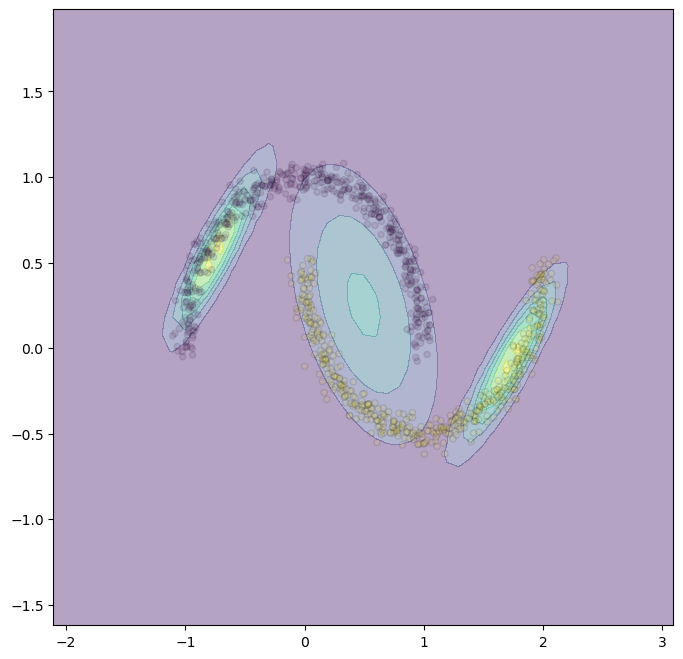

In [81]:
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k', alpha=0.1)
plt.show()

The algorithm clearly found a good solution, however it was easy because we generated the data from actual gaussian distributions and gave EM the correct number of clusters, When there are many dimesnions or many clusters or few instances, EM will strgggle to converge to the optimal solution in this case we need to regularise it, one way to do this is to limit the number of shapes and orientations the distributions can take by constraining the space of possible covariance matrices.

We may want to set the covariance_type hyper-parameter to one of the following values:

* Spherical
* Diag
* Tied

Examples of hyperparameter values over the same dataset:

<center><img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/EM_regularization.png"></center>

Gaussian Mixtures complexity depends on $m$, $n$, $k$ and the constraints over the covariance matrix, if its constraints fall into spheric or diag, complexity is $O(kmn)$. If its hyperparameter falls into tied or ful, the complexity is $O(kmn^2 + kn^3), in this case we cant scale to large number of features.

### 2.1 Anomaly Detection using Gaussian Mixtures

Anomaly detection also called outlier detection is the task of detecting instances that deviate strongly from the norm. These instances are called anomalies or outliers while the normal instances are called inliers. Anomaly detection is useful ina wide variety of applications such as fraud detection, detecting defectinve products in manufacturingm or removing outliers from a dataset before training another model (which can significantly improve the performance of the resulting model).

Using a Gaussian mixture model for anomaly detection is quite simple, any instances located in a low density region can be considered an anomaly. You must define what density threshold you want to use. For exmaple in a manufacturing company that tries to detect defective products, the ratio of defective products is usually known lets say it is 4%. You then set density threshold to the value that results in having 4% of the sinstances located in aries below the threshold density. If you notice too manu false positive you can lower the threshold. If too many false negatives we increase the threshold. The is the usual precision-recall tradeoff.

Process to identiy is as follows:


In [82]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
anomalies.shape

(40, 2)

A closely related task is novelty detection, it differs from anomaly detection in that the algorithm is assumed to be trained on a clean dataset. Meaning whatever special instances you find, they are not anomalies but rare novelties.

Just like KMeans, the GaussianMixture algorithm requires us to specify the number of custers. The question then arises as to how we can find it?

### 2.2 Selecting the Number of Clusters

With K-Means, you could use the inertia or the silhouette score to select the appropriate number of clusters. But with Gaussian mixtures, it is not possible to use these metrics because they are not reliable. Instead, you can try to find the model that minimises a *theoretical information criterion* such as the *Bauesian information crieterion (BIC)* or the *Akaike information criterion (AIC)*

$BIC = \log(m)p - 2\log(\hat{L})$

$AIC = 2p - 2\log(\hat{L})$

In these equations:

* $m$ is the number of instances
* $p$ is the number of parameters learned by the model
* $\hat{L}$ is the maximised value of the *likelihood function* of the model

Both the BIC and the AIC penalise models that have more oarameters to learn (e.g., more clusters) and they reward models that fit the data well. They often end up selecting the same model, When they differ, the model selected by the BIC tends to be simpler (fewer oarameters) than the one selected by the AIC but tends to not fit the data quite as well (especially true for large datasets). 

To compute the BIC and AIC call the bic() and aic() methods:

In [83]:
gm.bic(X), gm.aic(X)

(2807.9540595492585, 2724.522219806562)

The figure given below shows BIC and AIC for different numebr of clusters $k$, as you can see both BIC and AIC are lowest when $k=3$, so it ismost likely the best choice. Note that we could also search for the best value of covariance_type hyperparameter. For example if it is "spherical" rather than "full", then the model has significantly fewer parameters to learn, but it does not fit the data as well.

<center><img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/AIC_BIC.png"></center>

### 2.3 Bayesian Gaussian Mixture Models

Rather than manually searching for the optimal number of lusters, you can use the BayesianGaussianMixture class, which is capable of giving weights equal or close to zero to unneccesarry clusters. Set the number of clusters n_components to a value that you have good reason to belive is greatr than the optimalnumber of clusters (assumes you have minimal knwoledge about the problem at hand) and the algorithm will eliminate the unnecessary clusters automatically. For example, lets set the number of clusters to 10 and see what happens.

In [84]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.12, 0.  , 0.16, 0.13, 0.12, 0.13, 0.15, 0.01, 0.18, 0.  ])

In this model the cluster parameters are not treated as fixed model parameters but as latent random variables like the cluster assignments. So now $z$ includes both the cluster parameters and cluster assignments.

The beta distribution is commonly used to model random variables whose values lie within a fixed range. In this case, the range is from 0 to 1.

The stick breaking process is a good model for datasets where new instances are more likely to join large clusters than small clusters. E.g. people love to move to larger cities.

If the concentration $\alpha$ is high, then the $\[hi# values will likly be close to 0, and the SBP will generate more clusters. The wishard distribution is used to sample covariance matrices, the parameters $d$ and $V$ control the distribution of cluster shapes.

<center><img src="https://raw.githubusercontent.com/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/63b8d7a91ff1ca2fdc35947a6a390c5a81085bd2//static/imgs/BGMM.png"></center>

Prior knowledge about the latent variables $z$ can be encoded in a probability distribution $p(z)$ called the *prior*. For example, we may have a prior belief that the clusters are likely to be few (low concentration).

The more data we have the more the prior matters.

Bayes theorem tells us how to update the probability distribution over the latent variables after we observe some data $X$. it computes the posterior distribution $p(z|X)$, which is the conditional probability of $z$ given $X$.

$P(z|X) = \frac{P(X|z)P(z)}{P(X)}$

The evidence $P(X)$ is often intractable:

$P(X) = \int{}P(X|z)P(z)dz$

This intractability is one of he central problems in Bayesian Statistics and there are several approaches to solving it. One of them is variational inference. When picks a famility of distributions $q(z;\lambda) (\lambda:$ variation parameter) then optimises these parameters to make $q(z) \approx p(z|X)$. This is achieved by finding $\lambda$ that minimises the KL diverfence between $q(z)$ and $p(z|X)$ (Noted $D_{KL}(q||p)$).

The L equation can be rewritten as the log of the evidence minus the evidence lower bound (ELBO).

$D_{KL}(q||p) = \log p(X) - ELBO$

Since the log of the evidence dosent depend on $q$, minimising KL divergence is equivalent to minimising the ELBO expression. In practice there are different techniques to minimising the ELBO.

In mean field variational inference, it is necesarry to pick a family of distributions $q(z;\lambda)$  and the prior $p(z)$ very carefully to ensure that the equation for the ELBO simplifies to a form that can be computed, unfortunately there is no general way t do this.

An approach t maximising the ELBO is called *black box stochastic variational infernece (BBSVI)*: at each iteration a few samples are drawn from $q$ and theyre used to estimate thre gradients of the ELBO with regards to the variational parameters of $\lambda$, which are then used in gradient ascent step.

This approach makes it possible to use Bayesian inference with any differentiable system, even deep neural networks (called **Bayesian Deep Learning**).

We will know go over other algorithms capable of dealing with arbitary cluster shapes.

## 3. Other Algorithms for Anomaly and Novelty Detection

* PCA: if we compare the reconstruction error of a normal instance versus the reconstruction error of an anomaly, the latter will be greater.
* Fast-MCD: it assumes that the normal instances are generated from a single gaussian distribution and is good at ignoring others.
* Isolation Forest: uses random forest to split instances into groups and isolate the outliers randomly.
* Local Outlier Factor: it compares the density around an instance to the densities around its neighbors. An anomaly is often isolated in comparison to its neighbors.
* One-class SVm: it tries to seperate the instances in high-dimensioanl space from the **origin**, hence creating a small region that compasses all in the low-dim space. If a new instance dosent fall within this region it is an anomaly.

## Exercises

1. The classic Olivetti faces dataset contains 400 grayscale 64 X 64 pixel images of faces. Each image is falttened to a !D vector of size 4096. 40 different people were photographed (10 times each) and the usual task is to train a model to predict whihc person is represented in each picture. Load the dataset using sklearn.datasets.fetch_olivetti_faces() function, then split it into training/validation and test set. Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in the chapter). Visualise the clusters: do you see similar faces in each cluster.
2. Continue with the Olivetti faces dataset, train a classifier to predict whihc person is represented in each picture and evaluate it on the validation set, Next use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the nhumber of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set tp the original features (again, searching for the best number of clusters)?
3. Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the datasets dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method) and visualise them (if you used PCA you will need to use inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect anomalies (i.e., compare the output of the score_samples() methodfor normal images and anomalies).
4. Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti fces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next take some of the modified imahes you bilt in the previous exercise and look at their reconstruction error: notice how much lagrer the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face.